In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE



In [37]:
data_types = {
    'PD_DESC': 'category',
    'OFNS_DESC': 'category',
    'LAW_CODE': 'category',
    'LAW_CAT_CD': 'category',
    'ARREST_BORO': 'category',
    'ARREST_PRECINCT': 'category',
    'JURISDICTION_CODE': 'category',
    'AGE_GROUP': 'category',
    'PERP_SEX': 'category',
    'PERP_RACE': 'category'
}
df = pd.read_csv('NYPD_arrest_data_2021-2023.csv', dtype=data_types)
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [38]:
df.head()

,ARREST_DATE,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
0,2022-10-16,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,Felony,Brooklyn,76,2.0,25-44,Male,BLACK,40.676869,-74.006640,POINT (-74.00664 40.676869)
1,2022-04-12,"CONTROLLED SUBSTANCE,INTENT TO",117.0,DANGEROUS DRUGS,PL 2201602,Felony,Manhattan,14,0.0,18-24,Male,BLACK,40.753533,-73.994537,POINT (-73.9945368920152 40.7535327012632)
2,2022-03-19,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,Misdemeanor,Brooklyn,60,0.0,25-44,Male,WHITE,40.582620,-73.986223,POINT (-73.986223 40.58262)
3,2022-08-24,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,Felony,Brooklyn,84,0.0,18-24,Male,WHITE HISPANIC,40.690115,-73.989019,POINT (-73.989019 40.690115)
4,2022-01-07,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,Felony,Manhattan,24,2.0,25-44,Male,BLACK,40.796074,-73.967067,POINT (-73.9670667458109 40.7960743128304)


In [39]:
unique_offenses = df['OFNS_DESC'].unique()
print(unique_offenses)


['CRIMINAL MISCHIEF & RELATED OF', 'DANGEROUS DRUGS', 'PETIT LARCENY', 'GRAND LARCENY', 'SEX CRIMES', ..., 'DISRUPTION OF A RELIGIOUS SERV', 'UNLAWFUL POSS. WEAP. ON SCHOOL', 'NYS LAWS-UNCLASSIFIED VIOLATION', 'ADMINISTRATIVE CODES', 'FELONY SEX CRIMES']
Length: 65
Categories (65, object): ['ADMINISTRATIVE CODE', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'ALCOHOLIC BEVERAGE CONTROL LAW', 'ANTICIPATORY OFFENSES', ..., 'UNLAWFUL POSS. WEAP. ON SCHOOL', 'VEHICLE AND TRAFFIC LAWS', 'ADMINISTRATIVE CODES', 'FELONY SEX CRIMES']


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412713 entries, 0 to 412712
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ARREST_DATE        412713 non-null  datetime64[ns]
 1   PD_DESC            412713 non-null  category      
 2   KY_CD              412713 non-null  float64       
 3   OFNS_DESC          412713 non-null  category      
 4   LAW_CODE           412713 non-null  category      
 5   LAW_CAT_CD         412713 non-null  category      
 6   ARREST_BORO        412713 non-null  category      
 7   ARREST_PRECINCT    412713 non-null  category      
 8   JURISDICTION_CODE  412713 non-null  category      
 9   AGE_GROUP          412713 non-null  category      
 10  PERP_SEX           412713 non-null  category      
 11  PERP_RACE          412713 non-null  category      
 12  Latitude           412713 non-null  float64       
 13  Longitude          412713 non-null  float64 

### Transform Arrest Date

In [41]:
df['ARREST_YEAR'] = df['ARREST_DATE'].dt.year
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month 
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day
df = df.drop(columns=['ARREST_DATE'])

In [42]:
label_encoders = {}
for column in df.select_dtypes(include=['category', 'object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [43]:
features = ['ARREST_DAY','ARREST_MONTH', 'ARREST_YEAR', 'ARREST_BORO', 'ARREST_PRECINCT', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'Latitude', 'Longitude']
target = 'LAW_CAT_CD'
X = df[features]
y = df[target]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Heatmap

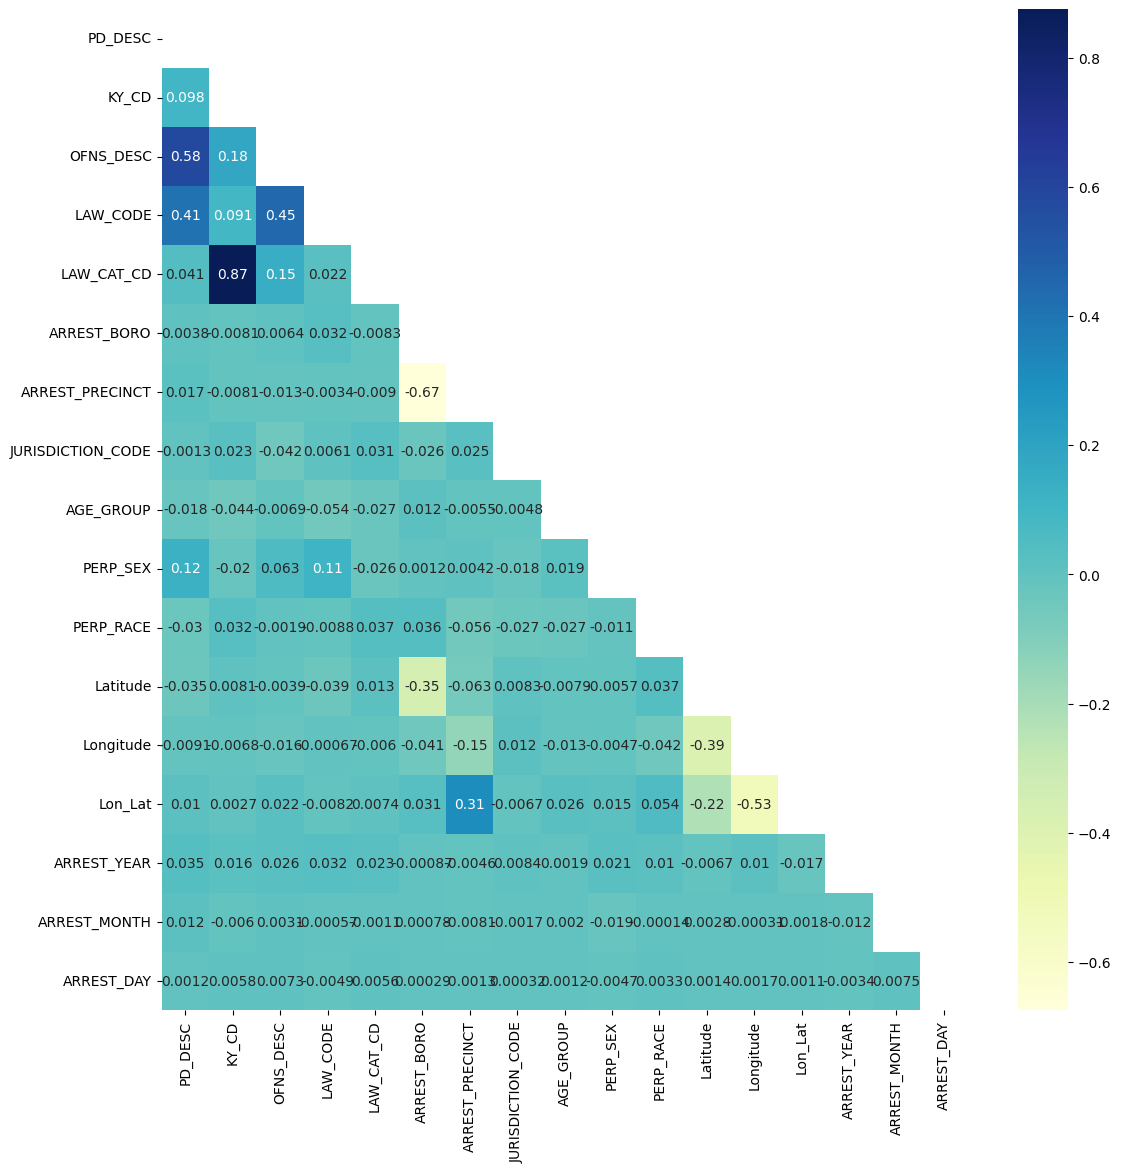

In [45]:
corr = df.corr()
plt.figure(figsize=(13,13))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(corr, cmap ='YlGnBu', annot=True, mask = mask, annot_kws={'size':10})
plt.savefig('Heatmap.png')

The heatmap shows a strong correlation (0.87) between LAW_CAT_CD and OFNS_DESC. Indicatin that the offense description is highly predictive of the law category code. intuitivly this makes sense since the type of offense would directly influence whether it is categorized as a misdemeanor, felony, etc.

Moderate correlation (0.45) between LAW_CAT_CD and LAW_CODE. This suggests that the specific law code is also an important predictor, though not as strong as the offense description.

KY_CD (0.15): Indicates a weak relationship.

AGE_GROUP (0.022): Shows a very weak correlation.

PERP_RACE (0.054): Also shows a weak correlation.

Latitude (0.054) and Longitude (0.31): Both have relatively low correlations.

In [46]:
numericals = ['ARREST_DAY','ARREST_MONTH', 'ARREST_YEAR','Latitude','Longitude']

In [47]:
preprocessor=ColumnTransformer([('num', StandardScaler(), numericals)], remainder ='passthrough')

### Logistic Regression

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.53      0.03      0.06     36498
           1       0.55      0.98      0.71     45384
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00       134
           4       0.00      0.00      0.00       429

    accuracy                           0.55     82543
   macro avg       0.22      0.20      0.15     82543
weighted avg       0.54      0.55      0.41     82543



/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is the proportion of true positive predictions among all positive predictions
Recall is the proportion of true positive predictions among all actual positives
The F1-Score is the harmonic mean of precision and recall
The performance metrics indicate a significant issue with class imbalance and model bias towards the majority class.

### Class 0: 
Accuracy: Of all the predictions only 50% were correct
Recall: Only 13% of actual Class 0 instances are correctly predicted as Class 0
F1 Score: The F1-Score of 0.21 indicates poor performance, as it balances both precision and recall

### Class 1:
Accuracy: Out of all instances predicted as Class 1, 56% are actually Class 1
Recall: The model correctly predicted this class 90% of the time
F1 Score: 69% is a reasonably high score but inconclusive due to the class imbalance

### Class 2:
The model fails to predict this correctly, indicating that it doesn't recognize this class at all

### Class 3, 4, and 5:
The model fails to predict these classes correctly, indicating that it  doesn't recognize these classes at all

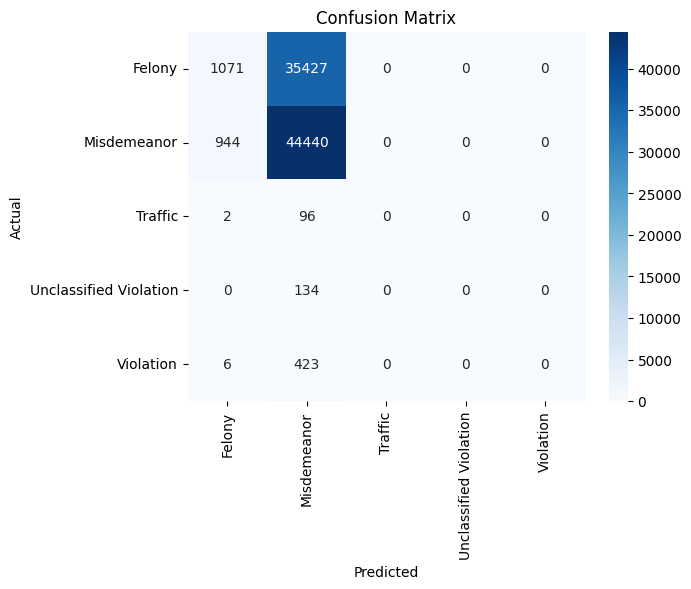

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders[target].classes_, yticklabels=label_encoders[target].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Model Results Function

In [57]:
def results(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    print(f'Accuracy Score: {accuracy_score(y, y_pred):.2f}')
    print(f'Precision Score (weighted): {precision_score(y, y_pred, average="weighted"):.2f}')
    print(f'Recall Score (weighted): {recall_score(y, y_pred, average="weighted"):.2f}')
    print(f'F1 Score (weighted): {f1_score(y, y_pred, average="weighted"):.2f}')

    # ROC Curve
    if hasattr(model, 'decision_function') or hasattr(model, 'predict_proba'):
        # Check if model supports decision_function or predict_proba
        if hasattr(model, 'predict_proba'):
            # For models that provide probability estimates (e.g., Random Forest)
            y_score = model.predict_proba(X)
        elif hasattr(model, 'decision_function'):
            # For models that provide decision function (e.g., SVM)
            y_score = model.decision_function(X)

        if len(model.classes_) > 2:
            # Binarize the output
            y_bin = label_binarize(y, classes=model.classes_)
            n_classes = y_bin.shape[1]

            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
            fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
            roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

            plt.figure()
            plt.plot(fpr["micro"], tpr["micro"],
                     label='micro-average ROC curve (area = {0:0.2f})'
                           ''.format(roc_auc["micro"]))
            for i in range(n_classes):
                plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                              ''.format(i, roc_auc[i]))

            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc='lower right')
            plt.show()

        else:
            fpr, tpr, _ = roc_curve(y, y_score[:, 1])
            roc_auc = auc(fpr, tpr)
            plt.figure()
            plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc='lower right')
            plt.show()
    else:
        print("The model does not support decision_function or predict_proba.")

In [54]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [56]:
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=10000, random_state=42)

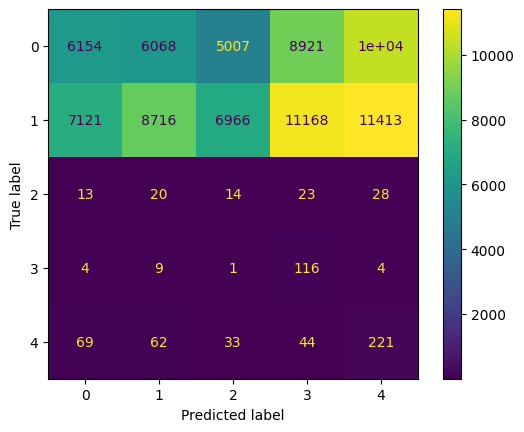

Accuracy Score: 0.18
Precision Score (weighted): 0.53
Recall Score (weighted): 0.18
F1 Score (weighted): 0.27


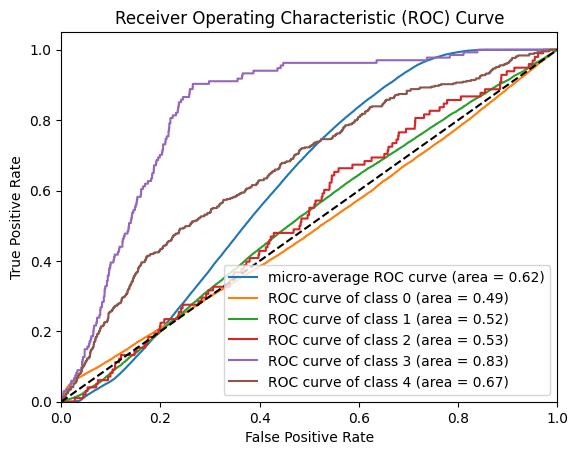

In [58]:
results(logreg, X_test, y_test)

### Gradient Boosting Machines (GBM)

In [79]:
gbc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [80]:
gbc.fit(X_train_smote, y_train_smote)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['ARREST_DAY', 'ARREST_MONTH',
                                                   'ARREST_YEAR', 'Latitude',
                                                   'Longitude'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

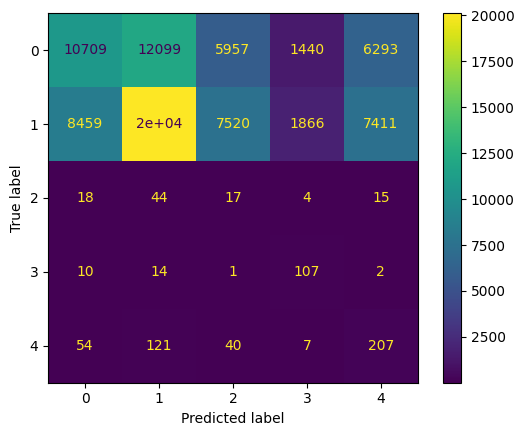

Accuracy Score: 0.38
Precision Score (weighted): 0.59
Recall Score (weighted): 0.38
F1 Score (weighted): 0.45


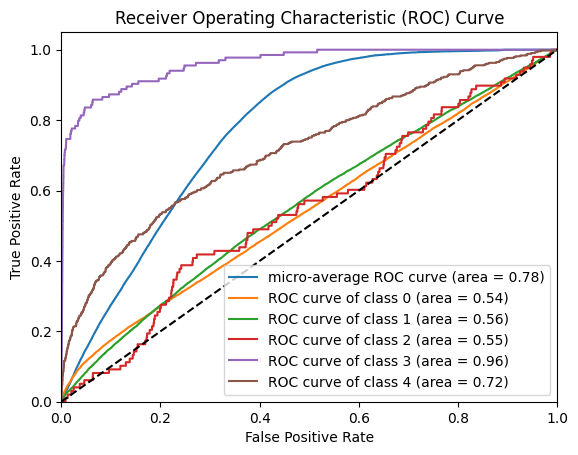

In [82]:
results(gbc, X_test, y_test)

In [86]:
gbc_params ={
    'classifier__learning_rate':[0.1,0.01,0.001],
    'classifier__n_estimators':[100,150],
    'classifier__max_depth':[10,15],
    'classifier__subsample':[0.9,0.8],
}

In [87]:
gbc_grid_search = GridSearchCV(gbc, gbc_params, cv=5, scoring='accuracy', n_jobs=-1, verbose =2)
gbc_grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


### Decision Trees

In [60]:
DTC= Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
DTC.fit(X_train_smote, y_train_smote)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['ARREST_DAY', 'ARREST_MONTH',
                                                   'ARREST_YEAR', 'Latitude',
                                                   'Longitude'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

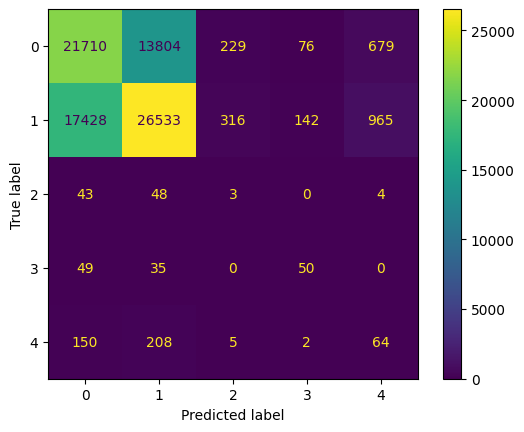

Accuracy Score: 0.59
Precision Score (weighted): 0.60
Recall Score (weighted): 0.59
F1 Score (weighted): 0.59


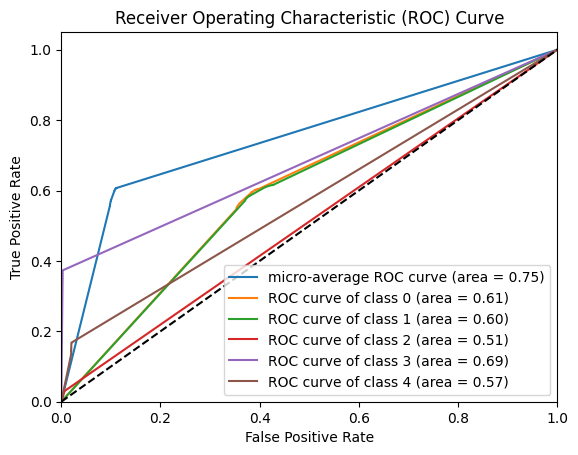

In [61]:
results(DTC, X_test, y_test)

In [74]:
dtc_param_grid ={
    'classifier__max_depth': [5,10,15],
    'classifier__min_samples_split': [2,10],
    'classifier__min_samples_leaf': [5,10],
    'classifier__criterion':['gini','entropy']
}

In [75]:
dtc_grid_search = GridSearchCV(DTC, dtc_param_grid, scoring ='accuracy', cv= 3, n_jobs = -1, verbose=2 )

In [76]:
dtc_grid_search.fit(X_train_smote, y_train_smote)
print(f"Best parameters: {dtc_grid_search.best_params_}")
best_dtc = dtc_grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END classifier__criterion=gini, classifier__max_depth=5, classifier__min_samples_leaf=5, classifier__min_samples_split=10; total time=   6.0s
[CV] END classifier__criterion=gini, classifier__max_depth=5, classifier__min_samples_leaf=5, classifier__min_samples_split=10; total time=   6.0s
[CV] END classifier__criterion=gini, classifier__max_depth=5, classifier__min_samples_leaf=5, classifier__min_samples_split=2; total time=   6.1s
[CV] END classifier__criterion=gini, classifier__max_depth=5, classifier__min_samples_leaf=5, classifier__min_samples_split=2; total time=   6.1s
[CV] END classifier__criterion=gini, classifier__max_depth=5, classifier__min_samples_leaf=5, classifier__min_samples_split=2; total time=   6.1s
[CV] END classifier__criterion=gini, classifier__max_depth=5, classifier__min_samples_leaf=5, classifier__min_samples_split=10; total time=   6.1s
[CV] END classifier__criterion=gini, classifier__max_depth=5

In [77]:
best_dtc.fit(X_train_smote,y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['ARREST_DAY', 'ARREST_MONTH',
                                                   'ARREST_YEAR', 'Latitude',
                                                   'Longitude'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=15,
                                        min_samples_leaf=5, random_state=42))])

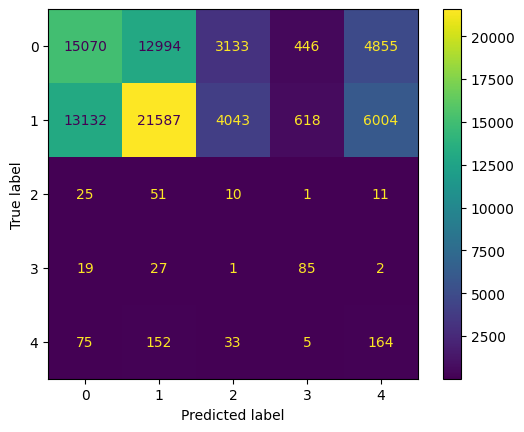

Accuracy Score: 0.45
Precision Score (weighted): 0.58
Recall Score (weighted): 0.45
F1 Score (weighted): 0.50


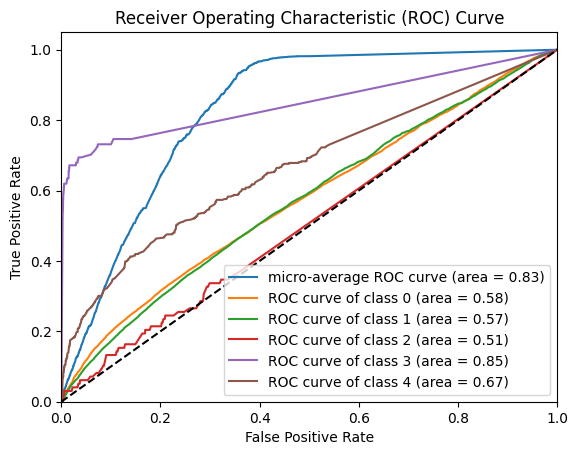

In [78]:
results(best_dtc,X_test, y_test)

### Support Vector Machines (SVM)

In [58]:
SVM = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
SVM.fit(X_train_smote, y_train_smote)

In [ ]:
results(SCVM, X_test, y_test)